# Exploring Scikit-learn In-built Diabetes Dataset

## Dataset
This is an inbuilt dataset from sci-kit learn. Diabetes dataset includes 442 samples of data around diabetes, with 10 feature variables. This dataset includes the concept of 'sex' as a feature variable important to research around diabetes. Many medical datasets include this type of binary classification. Think a bit about how categorizations such as this might exclude certain parts of a population from treatments.

## Import Libraries

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, model_selection


### Shape of dataset
The input return_X_y=True signals that X will be a data matrix, and y will be the regression target.

In [4]:
X, y = datasets.load_diabetes(return_X_y=True)
print(X.shape)
print(X[0])

(442, 10)
[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990749 -0.01764613]


In [5]:
print(y[:5])

[151.  75. 141. 206. 135.]


### Select portion of dataset to plot

In [6]:
print(X.shape)
X = X[:, 2]
X = X.reshape((-1,1))
print(X.shape)

(442, 10)
(442, 1)


### Split dataset into test and train

In [7]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33)

### Train Model
linear_model.LinearRegression() creates an instance of the LinearRegression class.

model fit() trains the model using the training data. The model learn relationships between X_train and y_train by finding the best-fit line that minimises residual sum of squares.The fit method calculates the optimal coefficients (slope and intercept)

In [8]:

model =  linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Predict Model
model.predict() cimputees predictions for the test features

In [9]:
y_pred = model.predict(X_test)

### Plot output

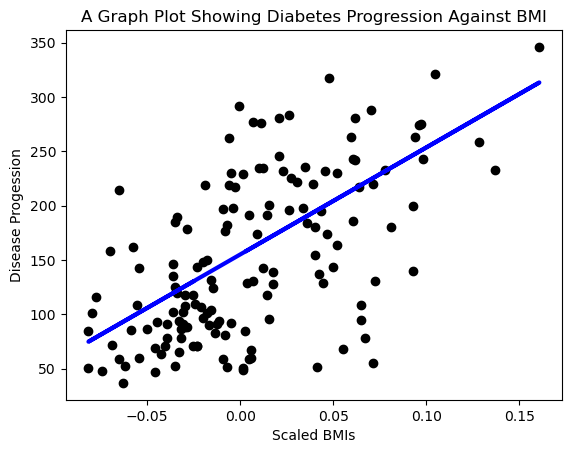

In [10]:
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Scaled BMIs')
plt.ylabel('Disease Progession')
plt.title('A Graph Plot Showing Diabetes Progression Against BMI')
plt.show()


In [11]:
### Evaluate Model


In [12]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [13]:
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 3705.135928077546
R^2 Score: 0.33422233216784913


An MSE of 3950 suggests the model's predictions are farther from the actual values. 

An R-squared value of 0.367 indicates that approximately 36.7% of the variance in the target variable can be explained by the feature in this model. Therefore, this suggests that the model does not explain a large porition of the variance.

To improve model, you can:
1. Feature engineer, feature select
2. Increase model complexity (polynomial regression, decision trees)
3. Use k-fold cross_validation to ensure model's performance is consistent and not due to random change in the train-test split.

### Visualise model performance
The actual vs predicted value plot should align closely to the diagoanl line where the predicted values math the actual values.

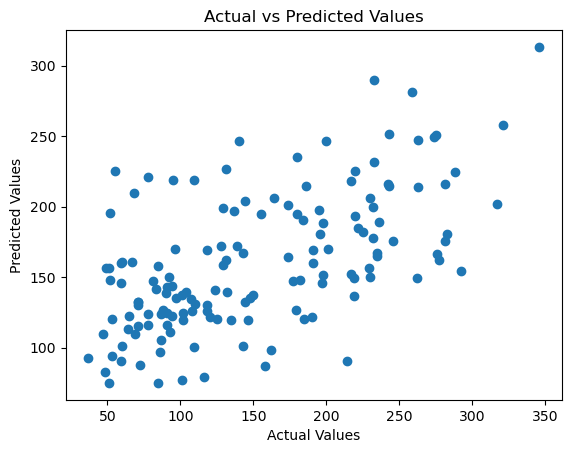

In [14]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()



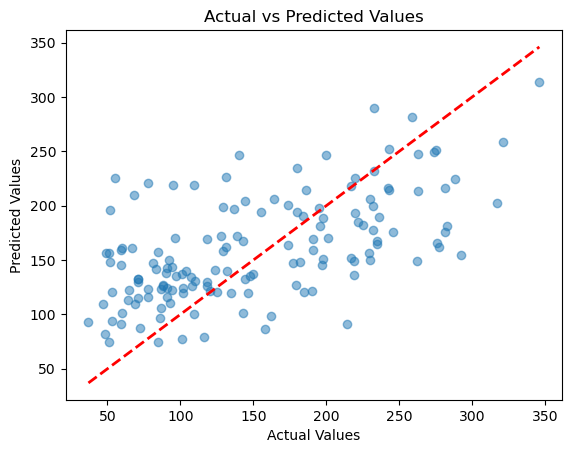

In [15]:
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are defined
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


### Residual Plot
This plot should be randomly scattered around zero with no obvious pattern.

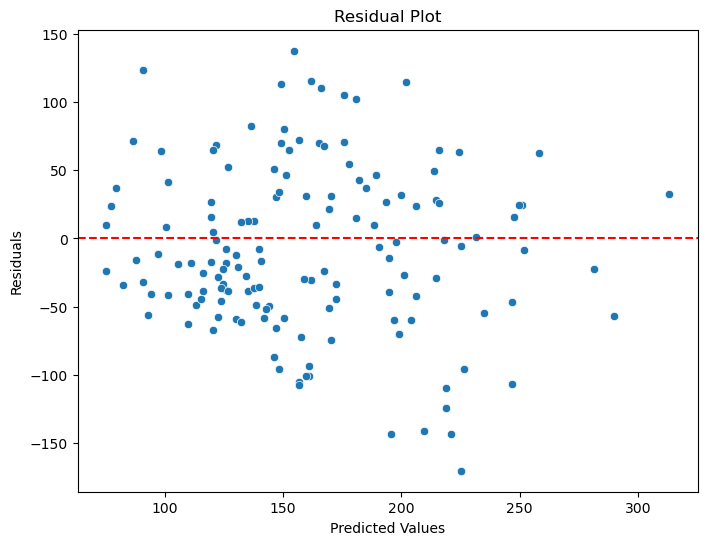

In [16]:
import seaborn as sns

# Calculate residuals
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


### Histogram of Residual
Residuals should be approximately normally distributed around zero.

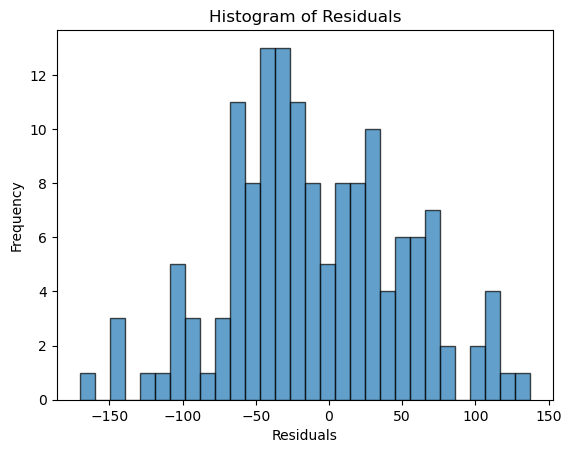

In [17]:
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()


### Q-Q Plot
Residuals should align along the diagonal line, indicating they follow a normal distribution.

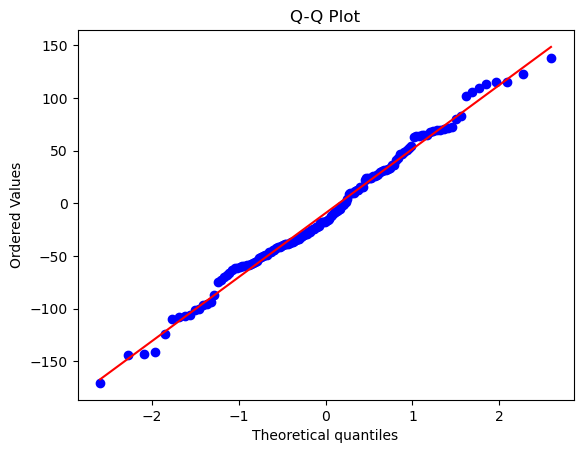

In [18]:
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()
